In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

## Testing pandas

In [3]:
#Get data from csv file
data = pd.read_csv("LinearExample/insurance.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(type(data['age']))
print(type(data[['age']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
#Get new dataframe with only age column
data[['age']].head()

,age
0,19
1,18
2,28
3,33
4,32


In [6]:
#Get new dataframe with age and smoker columns
data[['age','smoker']].head()

,age,smoker
0,19,yes
1,18,no
2,28,no
3,33,no
4,32,no


In [7]:
#Get from element 3  to 6
data[3:6]

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [8]:
#get first row as Series
data.iloc[0,:]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
charges     16884.924
Name: 0, dtype: object

In [9]:
#get first bmi data from first row
data.iloc[0,2]

27.9

### Filter data (select)

In [10]:
#Get people with age < 33
data[data['age'] < 33]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1331,23,female,33.400,0,no,southwest,10795.93733
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [11]:
#Get people with age < 33
data[data['age'] < 33]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1331,23,female,33.400,0,no,southwest,10795.93733
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [12]:
#Get people with age between 30 and 45
data[(data['age'] > 30) & (data['age'] < 45)]

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265


In [13]:
#Check charges in obese and smokers
data[(data['bmi'] > 30) & (data['smoker'] == 'yes')].describe()

,age,bmi,children,charges
count,144.000000,144.000000,144.000000,144.000000
mean,39.104167,35.544757,1.104167,41692.808992
std,14.361331,4.184624,1.113922,5829.158699
min,18.000000,30.020000,0.000000,32548.340500
25%,25.750000,32.275000,0.000000,37243.904350
50%,37.500000,34.960000,1.000000,40918.314500
75%,51.000000,37.207500,2.000000,45704.068725
max,64.000000,52.580000,4.000000,63770.428010


## Testing seaborn

In [31]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

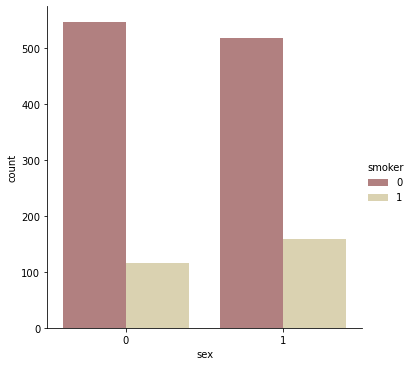

In [33]:
sns.catplot(x="sex", kind="count",hue = 'smoker', palette="pink", data=data)

Sex 1 (Men) somoke more than women. There are almost the same amount of men and women in the data.

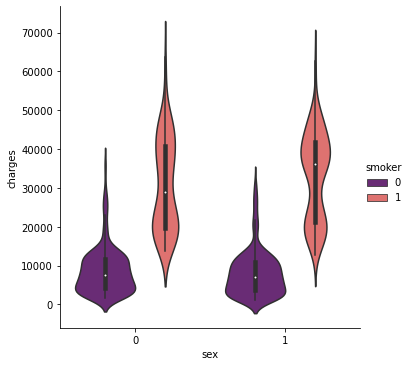

In [38]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

Charges for women and men are very similar, indicating both sexs are charged very similar way. Smokers on the other hand have a significant higer charge, the distribution is very srpread also, it has two peaks.

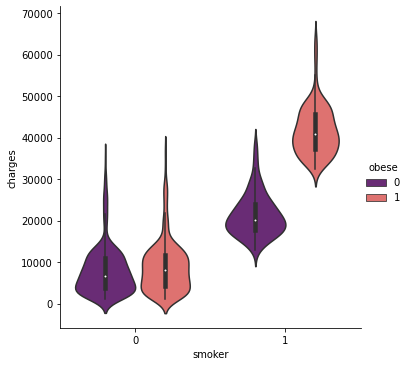

In [48]:
#Add a new column, if bmi > 30 is considered obese
data['obese'] = np.where(data['bmi'] > 30, 1, 0)
sns.catplot(x="smoker", y="charges",hue="obese",
            kind="violin", data=data, palette = 'magma')

Non smokers are charged very simmilar even if they are or aren't obese. On the other hand, in smokers side which are charged higher, whe have a very visible difference between obese and smokers.

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

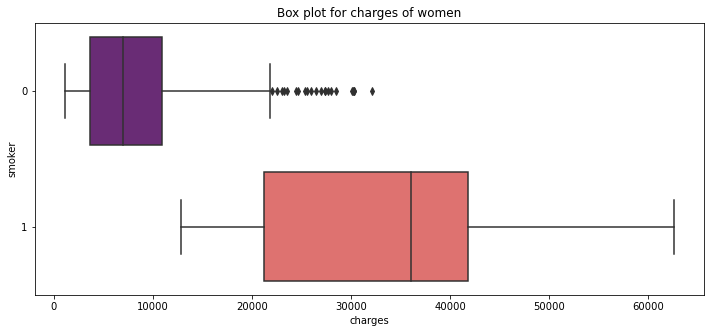

In [35]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

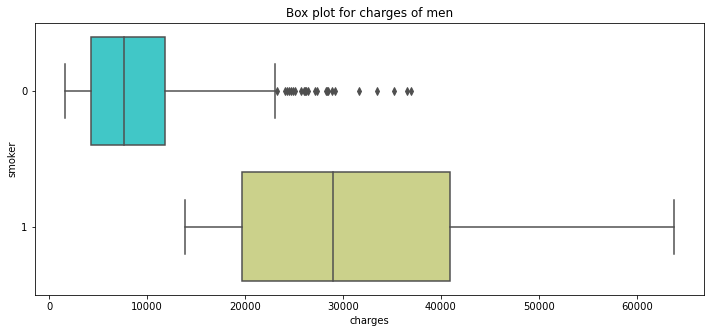

In [36]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

## Resources

- https://www.dataquest.io/blog/pandas-cheat-sheet/
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- https://seaborn.pydata.org/api.html